<a href="https://colab.research.google.com/github/PaulToronto/DataCamp---Keras-Fundamentals---4-Courses/blob/main/1_1_Introducing_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.1 - Introducing Keras

## What is Keras?

- Keras is a high-level deep learning framework
- It is an open source deep learning library
- It runs on top of other frameworks like:
    - TensorFlow
    - Thean
    - CNTK
- Created by French AI researcher François Chollet
- Because it is high level of abstraction, you can build industry-ready models with much less code
- Can use it to build simple networks or more complex ones like auto-encoders
- Keras 2.0 is fully integrated with TensorFlow so you can get the best of both worlds as needed and in the same pipeline
    - TensorFlow enables you to access low-level features if you need finer tuned control
- Why use a neural network?
    - Neural networks are good feature extractors
    - Previously it was the domain experttha had to set rules based on experimentation and heuristics
    - Neural networks can laern the best features and their combination and can perform feature engineering themselves
    - Good for unstructured data that does not fit easily into a table
        - sound data
        - video
        - images
        - etc.
    - Downside is that neural networks are hard to interpret

## Weights (Parameters)

- The **first layer** (shown inside the red border) of this neural network has **8 weights**
    - w0, w1, w2, w3, w4, w5
        - 3 input nodes x 2 nodes in hidden layer = 6 weights
    - b0, b1
        - each node in the hidden layer has a bias weight = 2 weights
- The **second layer** has **3 weights**
    - 2 input nodes x 1 output node = 2 weights
    - 1 bias weight = 1 weight


<img src='https://raw.githubusercontent.com/PaulToronto/DataCamp---Introduction-to-Deep-Learning-with-Keras/main/images/weights.png'/>


## Your first neural network

Build a network that takes two numbers as an input, passes them through a hidden layer of 10 neurons, and finally outputs a single non-constrained number.

Keras allows you to build models using one of two APIs:

- Functional API
- Sequential API

Here we focus on the Sequential API

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import numpy as np
import matplotlib.pyplot as plt

```python
# This is how it is taught in the course, but it is the old way
#. it gives a waring:

#  UserWarning: Do not pass an `input_shape`/`input_dim` argument
#.  to a layer. When using Sequential models, prefer using
#. an `Input(shape)` object as the first layer in the model instead

# Create a sequential model
model = Sequential()

# Add an input layer that takes 3 numbers as an input
#. and outputs a hidden layer with 4 neurons
model.add(Dense(4, input_shape=(3,), activation='relu'))

# And a 2-neuron output layer
model.add(Dense(2))
```

The new way is explained here:
https://keras.io/guides/sequential_model/#specifying-the-input-shape-in-advance

In [2]:
from keras import Input

In [3]:
# Create a sequential model
model = Sequential()

# Add an input layer that takes 3 numbers as an input
#. and outputs a hidden layer with 4 neurons
model.add(Input(shape=(3,)))
# 'relu' is an activation function: covered later
model.add(Dense(4, activation='relu'))

# And a 2-neuron output layer
model.add(Dense(2))

In [4]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 4)                   │              16 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │              10 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26 (104.00 B)

 Trainable params: 26 (104.00 B)

 Non-trainable params: 0 (0.00 B)

- The first layer has $(3 \times 4) + 4 = 16$ weights
- The second layer has $(4 \times 2) + 2 = 10$ weights

In [5]:
model_weights = model.weights
model_weights

[<KerasVariable shape=(3, 4), dtype=float32, path=sequential/dense/kernel>,
 <KerasVariable shape=(4,), dtype=float32, path=sequential/dense/bias>,
 <KerasVariable shape=(4, 2), dtype=float32, path=sequential/dense_1/kernel>,
 <KerasVariable shape=(2,), dtype=float32, path=sequential/dense_1/bias>]

In [6]:
for item in model_weights:
    print(item.shape)

(3, 4)
(4,)
(4, 2)
(2,)


In [7]:
weights_per_layer = (3 * 4 + 4, 4 * 2 + 2)
weights_per_layer

(16, 10)

## Counting Parameters

<img src='https://raw.githubusercontent.com/PaulToronto/DataCamp---Introduction-to-Deep-Learning-with-Keras/main/images/counting_parameters.png'/>

In [8]:
# this is what each layer should have
num_weights_first_layer = 3 * 5 + 5
num_weights_second_layer = 5 * 1 + 1
num_weights_first_layer, num_weights_second_layer

(20, 6)

In [9]:
# let's see if those numbers are correct
model = Sequential()

# Add a dense layer with 5 neurons and 3 inputs
model.add(Input(shape=(3,)))
model.add(Dense(5, activation='relu'))

# Add a final dense layer with 1 nueron and no activation
model.add(Dense(1))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 5)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26 (104.00 B)

 Trainable params: 26 (104.00 B)

 Non-trainable params: 0 (0.00 B)

## Output shape

In [10]:
dense_5 = Dense(5, activation='relu')
dense_5.compute_output_shape(input_shape=(2, ))

(5,)

In [11]:
model.layers[0].compute_output_shape(input_shape=(2,))

(5,)

In [12]:
len(model.layers)

2

In [13]:
model.layers[1].compute_output_shape(input_shape=dense_5.compute_output_shape(input_shape=(2, )))

(1,)

## Surviving a meteor strike

- This is just a toy example for demonstration purposes
- You will build a simple regression model to predict the orbit of the meteor!
- Your training data consist of measurements taken at time steps from **-10 minutes before the impact region to +10 minutes after**. Each time step can be viewed as an X coordinate in our graph, which has an associated position Y for the meteor orbit at that time step.
- *Note that you can view this problem as approximating a quadratic function via the use of neural networks.*

<img src='https://raw.githubusercontent.com/PaulToronto/DataCamp---Introduction-to-Deep-Learning-with-Keras/main/images/meteor_orbit_3.jpg'/>

- This data is stored in two numpy arrays: one called time_steps , what we call features, and another called y_positions, with the labels. Go on and build your model! It should be able to predict the y positions for the meteor orbit at future time steps.

### The Data

In [14]:
import pandas as pd

In [15]:
# get `time_steps`: these are the features (there is only one)
file_path = 'https://raw.githubusercontent.com/PaulToronto/'
file_path += 'DataCamp---Introduction-to-Deep-Learning-with-Keras/main/'
file_path += 'data/time_steps.csv'

time_steps = pd.read_csv(file_path, header=None).values.flatten()
time_steps.shape, time_steps

((2000,),
 array([-10.        ,  -9.989995  ,  -9.97998999, ...,   9.97998999,
          9.989995  ,  10.        ]))

In [16]:
# get `y_positions`: these are the labels
file_path = 'https://raw.githubusercontent.com/PaulToronto/'
file_path += 'DataCamp---Introduction-to-Deep-Learning-with-Keras/main/'
file_path += 'data/y_positions.csv'

y_positions = pd.read_csv(file_path, header=None).values.flatten()
y_positions.shape, y_positions

((2000,),
 array([100.        ,  99.80000005,  99.6002003 , ...,  99.6002003 ,
         99.80000005, 100.        ]))

### The model

In [17]:
# Instantiate a Sequential model
model = Sequential()

# Add a Dense layer with 50 neurons and an input of 1 neuron
model.add(Input(shape=(1,)))
model.add(Dense(50, activation='relu'))

# Add two Dense layers with 50 neurons and relu activation
# Note that only the first layer needs the input shape
#. for subsequent layers it is inferred from the previous layer
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))

# End your model with a Dense layer and no activation
model.add(Dense(1))

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 50)                  │             100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,251 (20.51 KB)

 Trainable params: 5,251 (20.51 KB)

 Non-trainable params: 0 (0.00 B)

 - There is no activation function in our output layer since `y_positions` aren't bounded and they can take any value. Your model is built to perform regression task.

### Training

- Before training a Keras model you need to **compile** it
- This is done with the `compile()` function
- The `optimizer` parameter: used for weight updating
- The `loss` parameter: the loss function which we want to minimize
    - both the `optimizer` and `loss` parameters are covered in more detail later

Signature (with default values):
```python
model.compile(optimizer='rmsprop',
              loss=None,
              loss_weights=None,
              metrics=None,
              weighted_metrics=None,
              run_eagerly=False,
              steps_per_execution=1,
              jit_compile='auto',
              auto_scale_loss=True)
```

In [18]:
model.compile(optimizer='adam',
              loss='mse')

In [19]:
# train your model
# this can take a while
# x: features
# y: labels
model.fit(x=time_steps,
          y=y_positions,
          epochs=30)

Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 1880.0095
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 539.9879
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 142.9426
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 124.0502
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 104.6670
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 81.2195
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 59.1672
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 38.8203
Epoch 9/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 24.8861
Epoch 10/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 15.6486
Epoch 11/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 9.6563
Epoch 12/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 6.3266
Epoch 13/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.9576
Epoch 14/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.8376
Epoch 15/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.5894
Epo

- While the `fit()` method is running, you can see how the loss function decreases as epochs go by.
- *Note: During an **epoch**, our entire training data passes through the neural network and the respective updates take place using back-propagation*


In [20]:
# Final loss value (mean squared error)
model.evaluate(time_steps, y_positions)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2027


0.15860788524150848

### Predicting on "seen data"

In [21]:
def plot_orbit(model_preds):
    axeslim=int(len(model_preds)/2)
    plt.plot(np.arange(-axeslim, axeslim+1),
             np.arange(-axeslim, axeslim+1)**2,
             color='mediumslateblue',
             label='Scientist\'s Orbit')
    plt.plot(np.arange(-axeslim, axeslim+1),
             model_preds,
             color='orange',
             linestyle='dotted',
             label='Predicted Orbit')
    plt.axis([-40, 41, -5, 550])
    plt.legend()
    plt.title('Predicted Orbit vs Scientist\'s Orbit')

In [22]:
twenty_min_orbit = model.predict(np.arange(-10, 11))
twenty_min_orbit

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


array([[98.73543   ],
       [81.68856   ],
       [64.52342   ],
       [49.286034  ],
       [36.22659   ],
       [25.370155  ],
       [16.296984  ],
       [ 9.318314  ],
       [ 4.2982845 ],
       [ 1.1881491 ],
       [ 0.10884826],
       [ 1.0473331 ],
       [ 4.1033287 ],
       [ 8.747223  ],
       [16.232336  ],
       [25.198843  ],
       [36.26328   ],
       [49.285168  ],
       [64.73672   ],
       [81.70964   ],
       [98.60061   ]], dtype=float32)

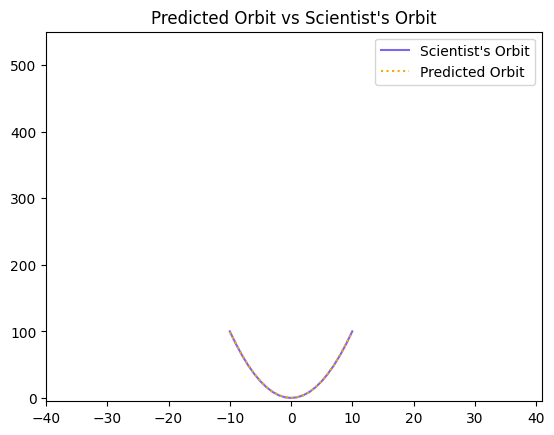

In [23]:
plot_orbit(twenty_min_orbit)

### Predicting on "unseen data"

In [24]:
eighty_min_orbit = model.predict(np.arange(-40, 41))
eighty_min_orbit

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


array([[4.60345306e+02],
       [4.48449738e+02],
       [4.36554169e+02],
       [4.24658661e+02],
       [4.12763062e+02],
       [4.00867493e+02],
       [3.88971924e+02],
       [3.77076385e+02],
       [3.65180786e+02],
       [3.53285217e+02],
       [3.41389618e+02],
       [3.29494110e+02],
       [3.17598541e+02],
       [3.05702942e+02],
       [2.93807404e+02],
       [2.81911774e+02],
       [2.70016235e+02],
       [2.58120697e+02],
       [2.46225098e+02],
       [2.34329498e+02],
       [2.22433868e+02],
       [2.10538239e+02],
       [1.98642563e+02],
       [1.86746918e+02],
       [1.74851273e+02],
       [1.62955643e+02],
       [1.50895584e+02],
       [1.38635529e+02],
       [1.26099998e+02],
       [1.12915329e+02],
       [9.87354279e+01],
       [8.16885605e+01],
       [6.45234222e+01],
       [4.92860336e+01],
       [3.62265892e+01],
       [2.53701553e+01],
       [1.62969837e+01],
       [9.31831360e+00],
       [4.29828453e+00],
       [1.18814909e+00],


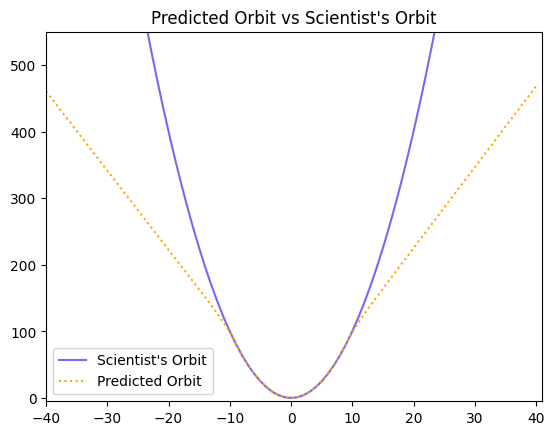

In [25]:
plot_orbit(eighty_min_orbit)